# Title: K-Means Clustering with Sklearn

## Introduction
In this notebook, we will explore K-Means clustering using the sklearn library. We will learn how to cluster a simple dataset, interpret the results, identify the optimum number of clusters, understand the issues related to local minimum convergence and centroid initialization, and explore the K-Means++ algorithm for improved centroid initialization.



## Learning Objectives
- Implement K-Means clustering using sklearn
- Interpret clustering results
- Identify the optimum number of clusters
- Understand the impact of local minimum convergence and centroid initialization
- Implement K-Means++ for improved centroid initialization



In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, load_iris

#### We will generate a small synthetic dataset using make_blobs. You can read more about it at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [2]:
# Create a small Dataset
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=2.1)
print(X.shape)

(300, 2)


/var/folders/6x/wkl1tz7x4lv2t19tnbq3drhm0000gn/T/ipykernel_42163/2342071383.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


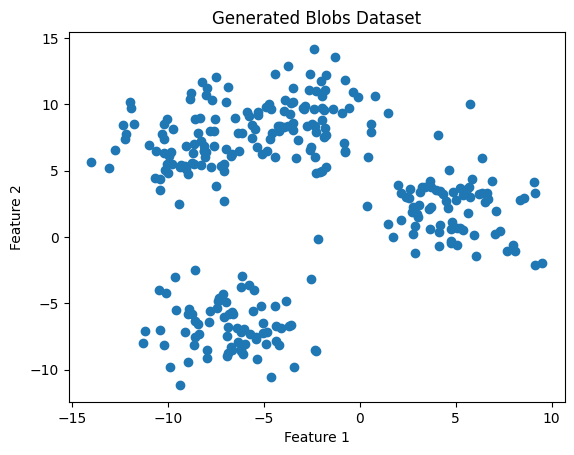

In [3]:
# Visualize Dataset
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Blobs Dataset')
plt.show()

#### Now we will cluster this data using KMeans, for which we will use the KMeans class. You can read more about it at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [5]:
# Implement K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=42)

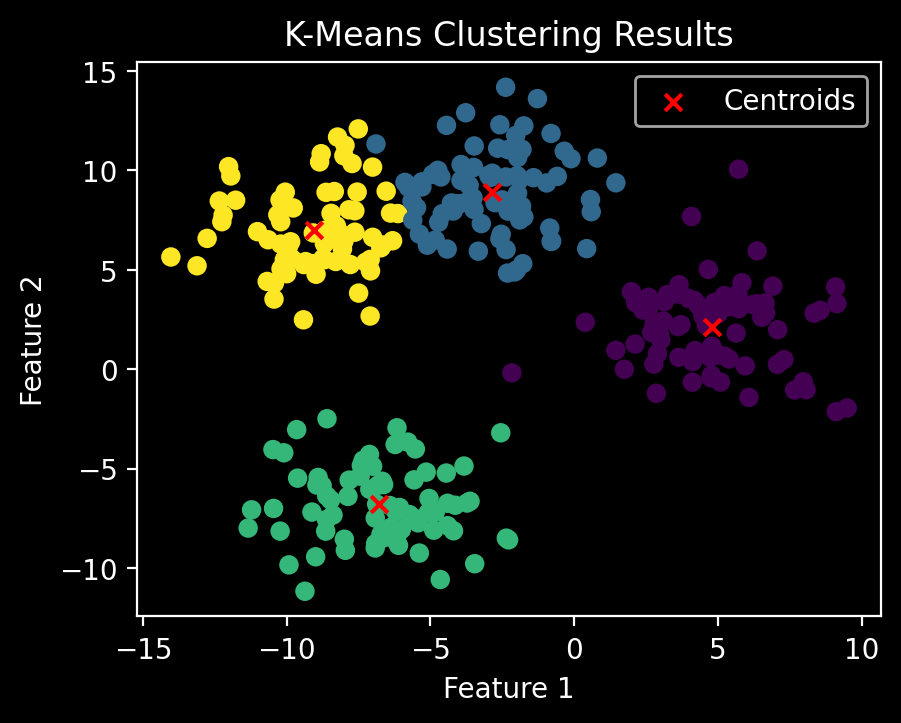

In [6]:
# Visualize Clustering Results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

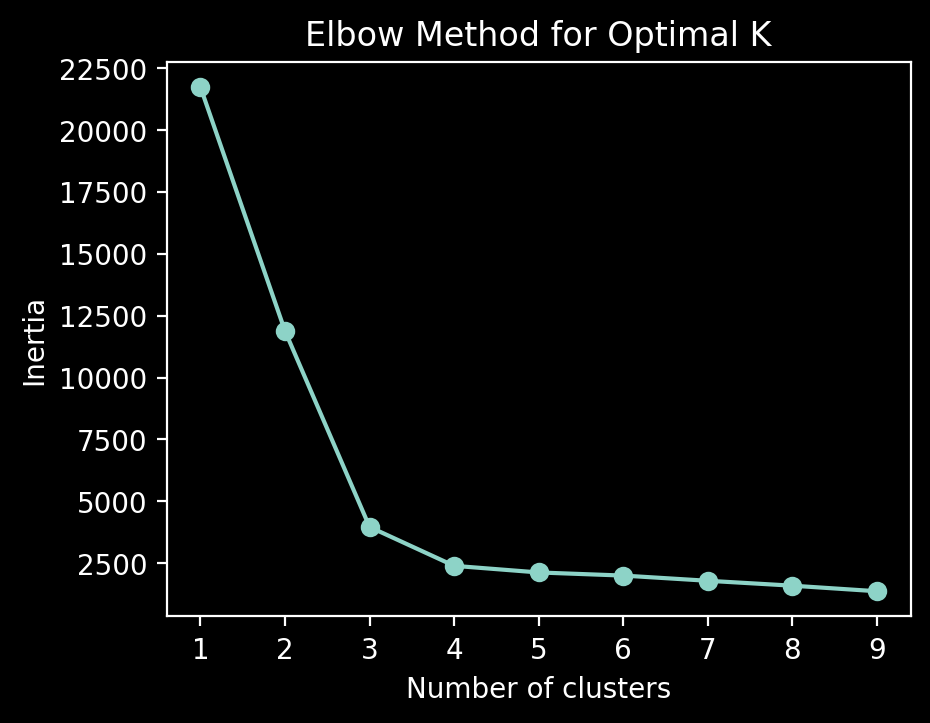

In [7]:
# Elbow Method for Optimum Number of Clusters
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(ticks=K)
plt.show()

## K-means vs. K-means++

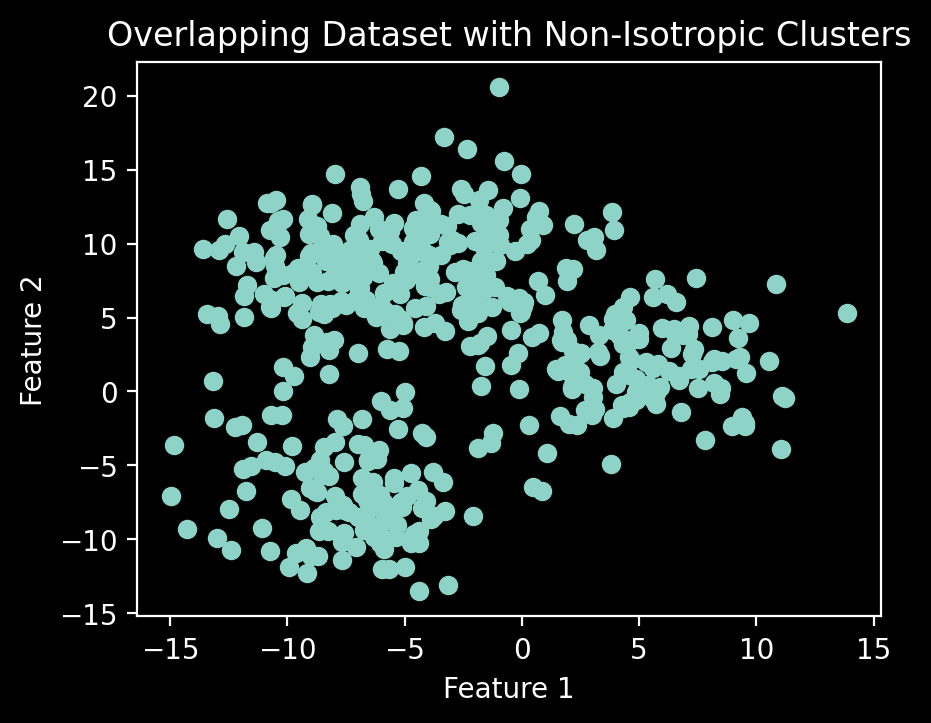

In [8]:
# Create an overlapping dataset with non-isotropic clusters
X, y = make_blobs(n_samples=500, centers=4, cluster_std=3.0, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Overlapping Dataset with Non-Isotropic Clusters')
plt.show()


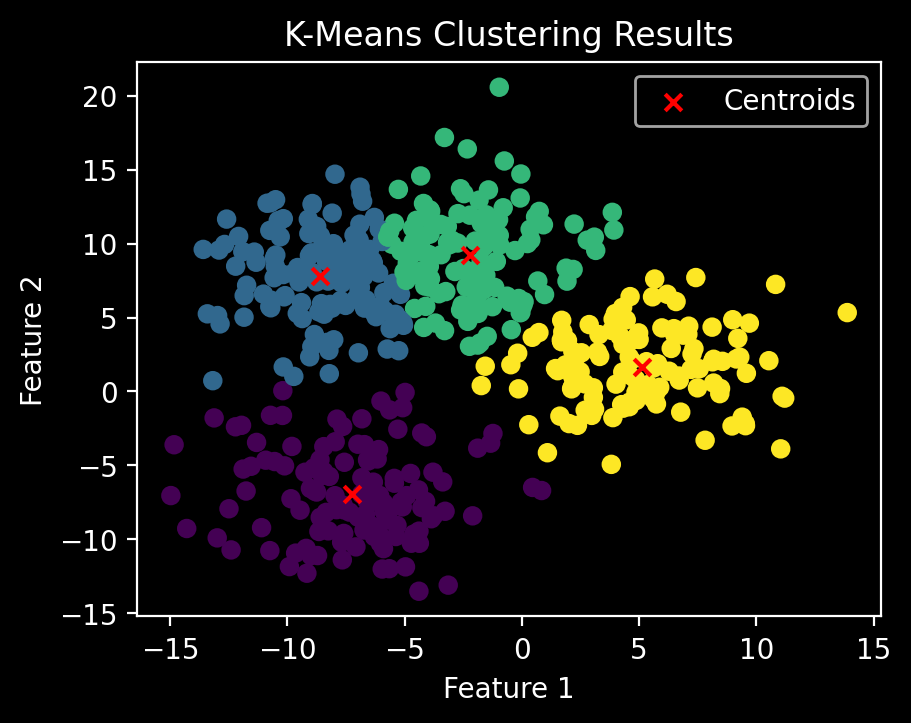

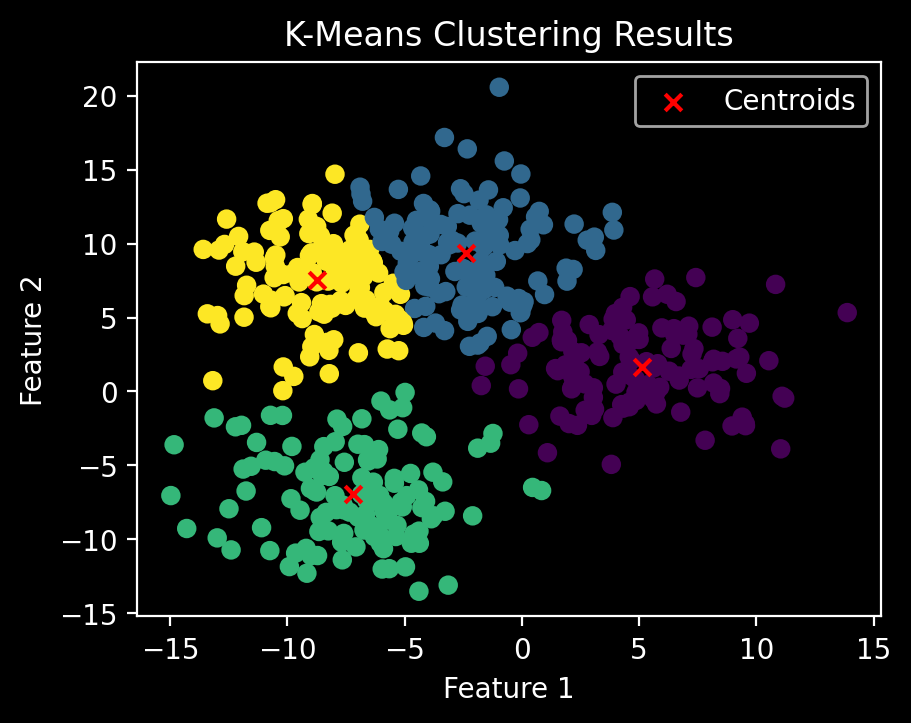

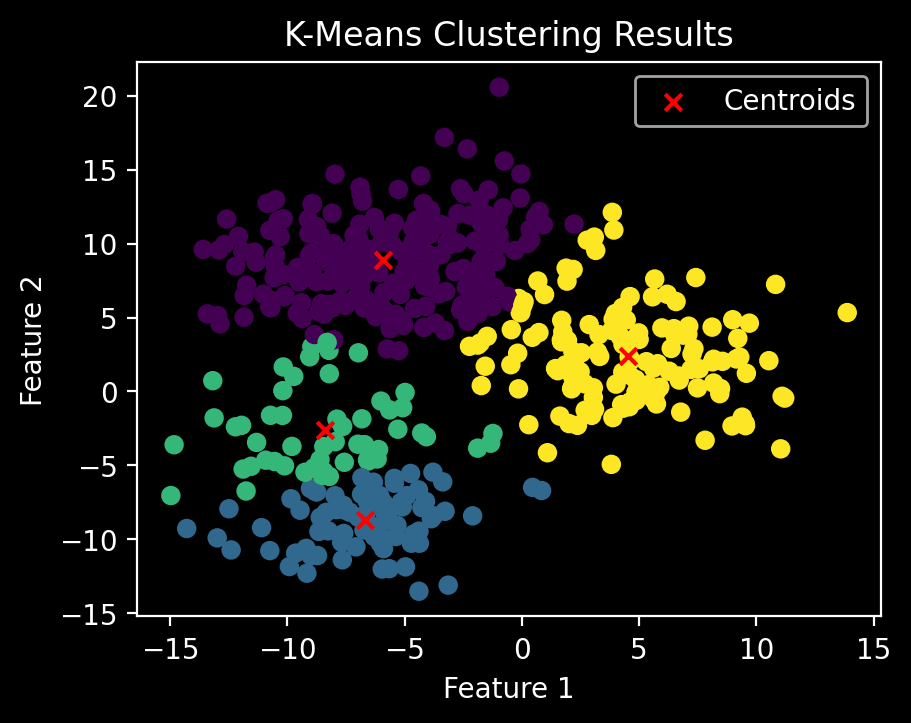

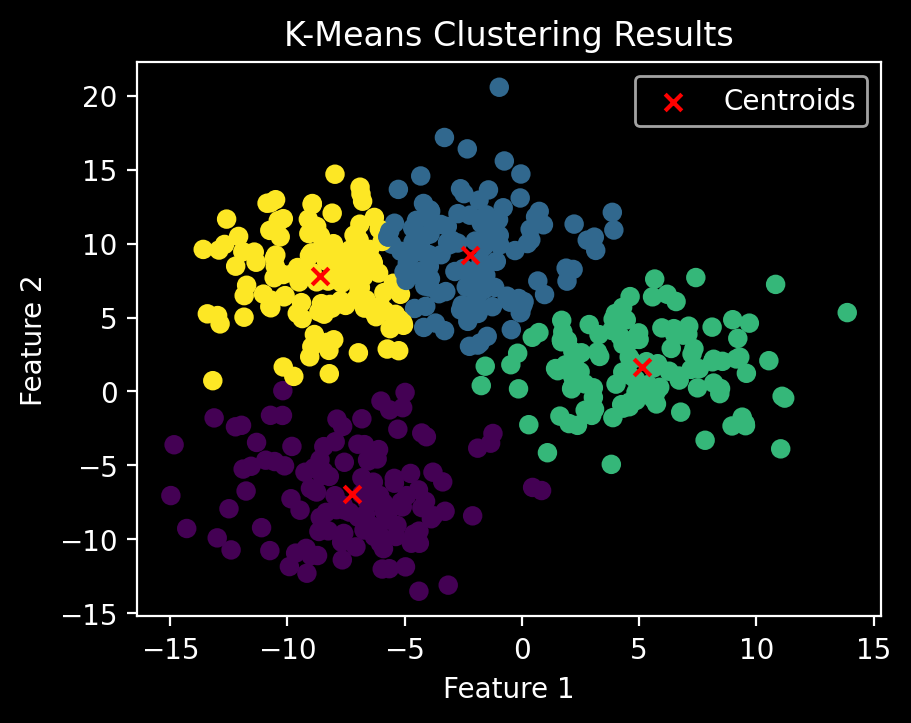

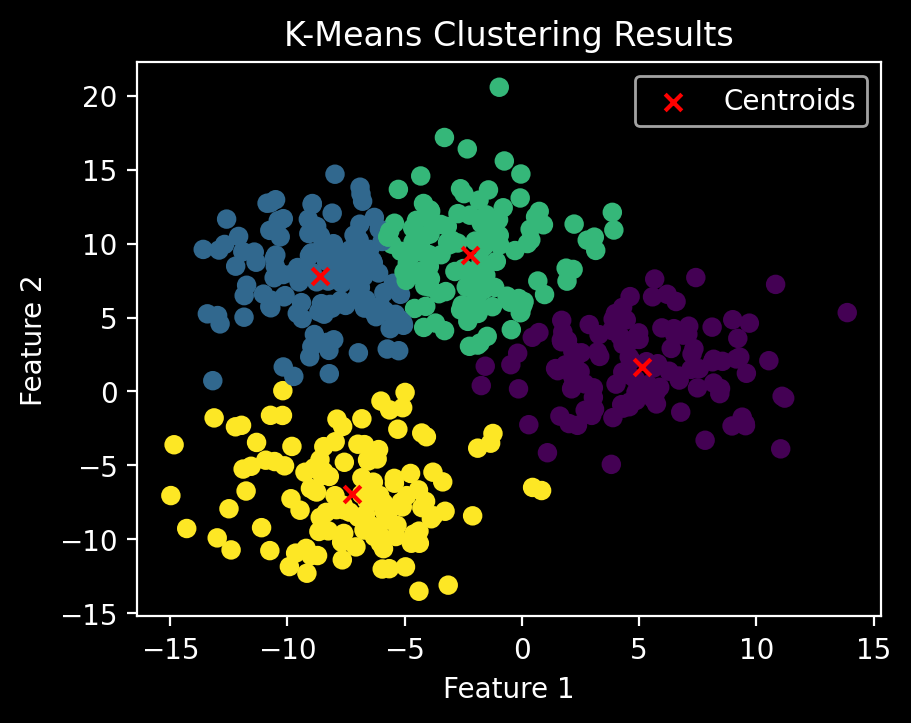

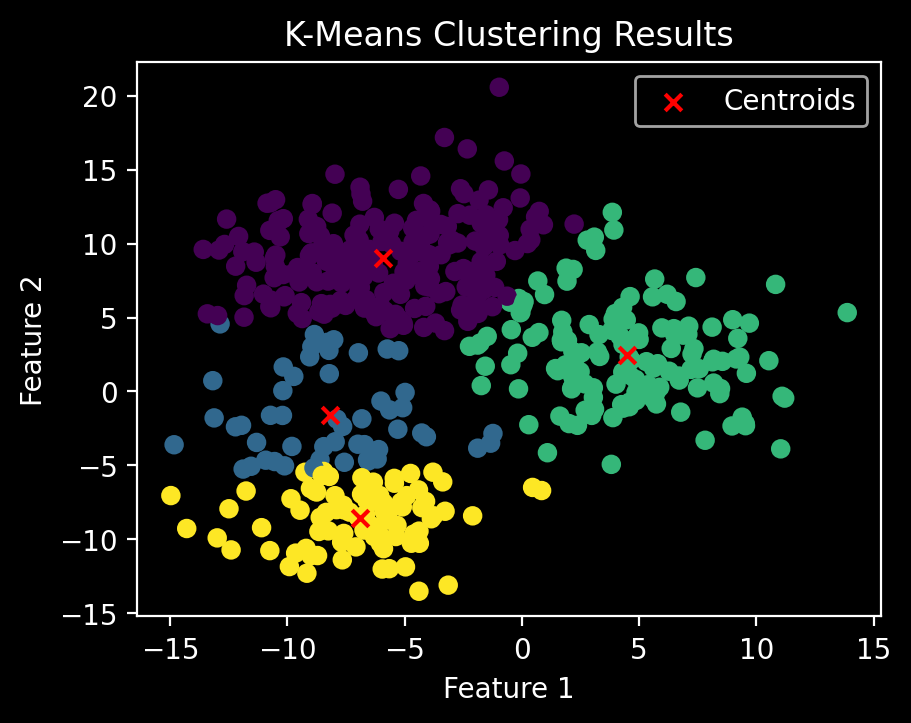

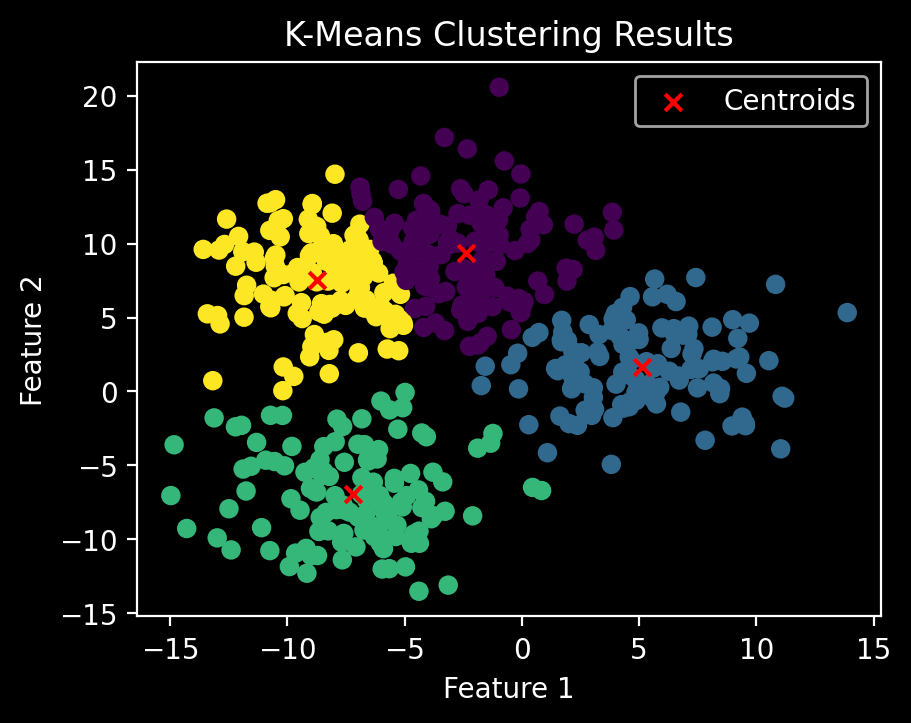

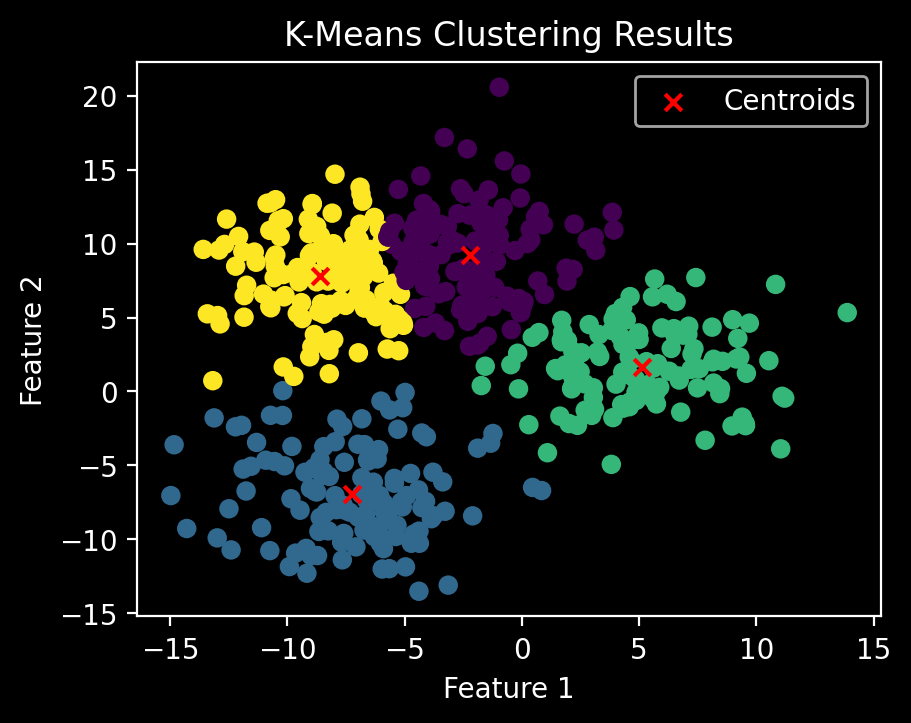

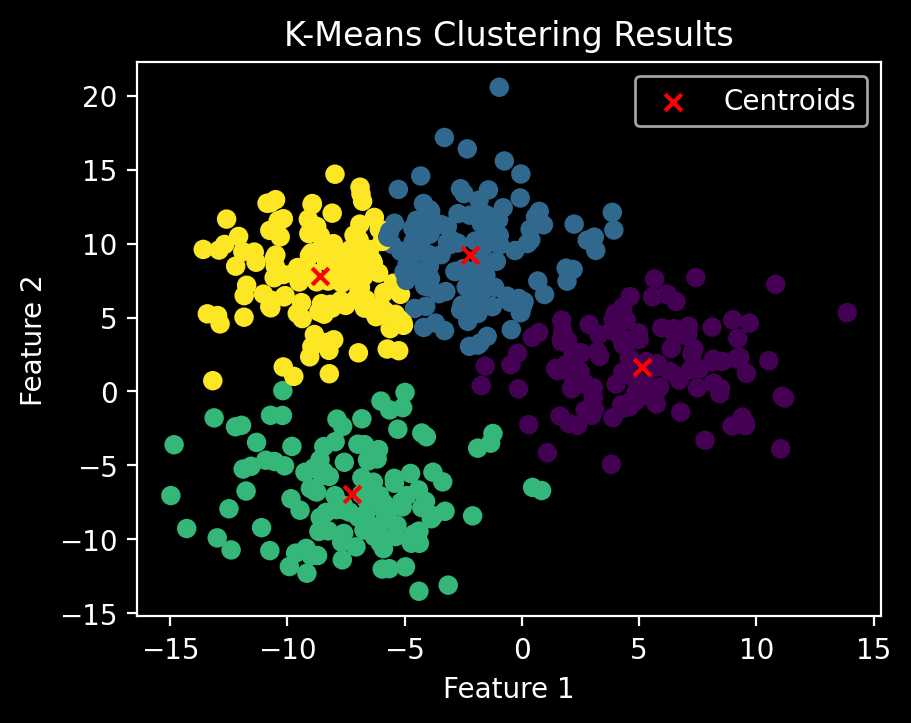

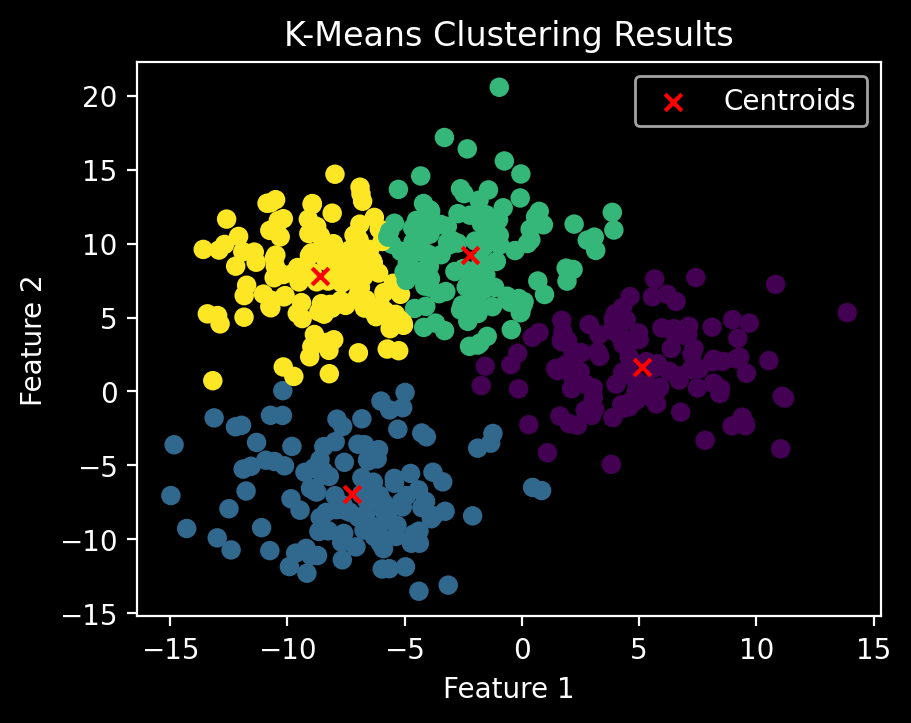

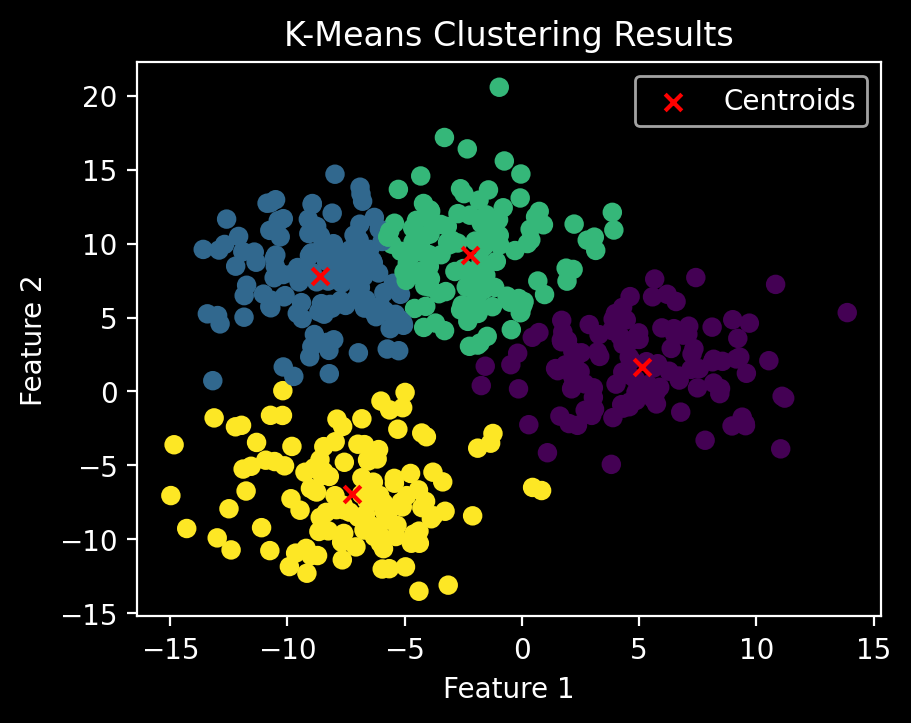

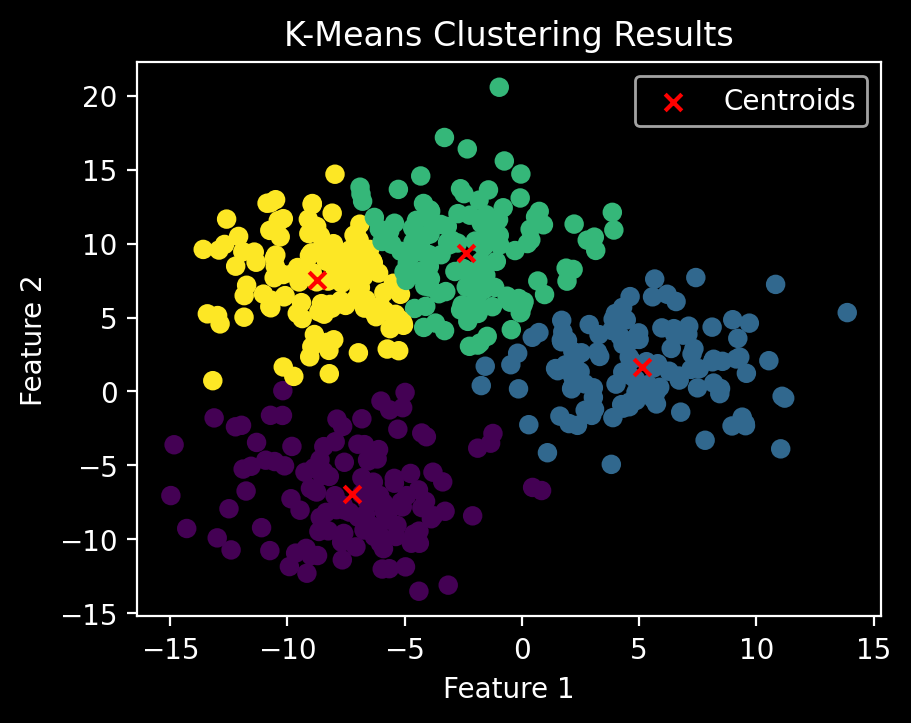

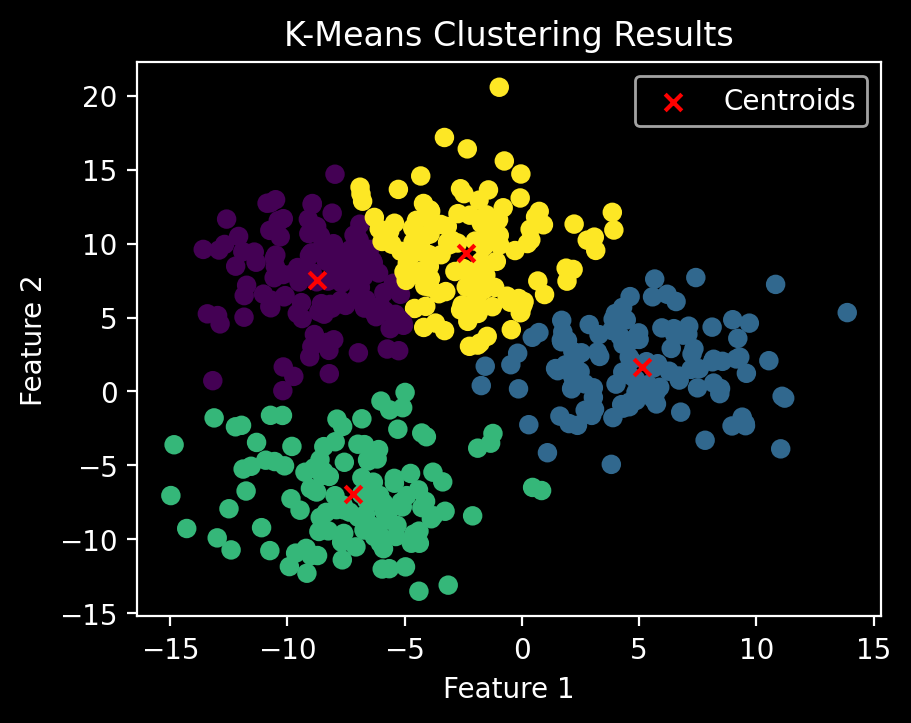

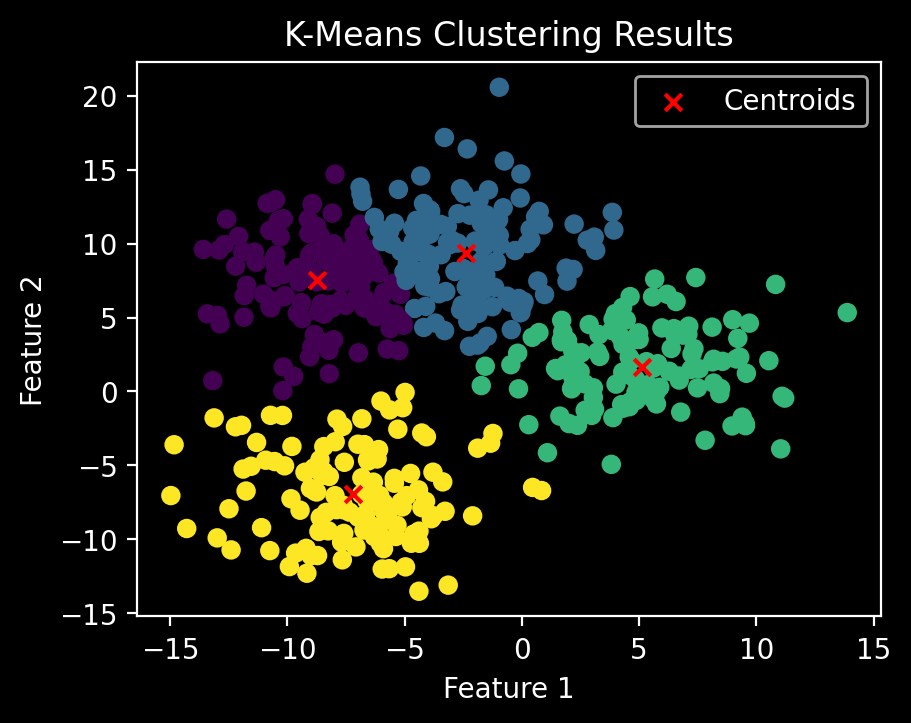

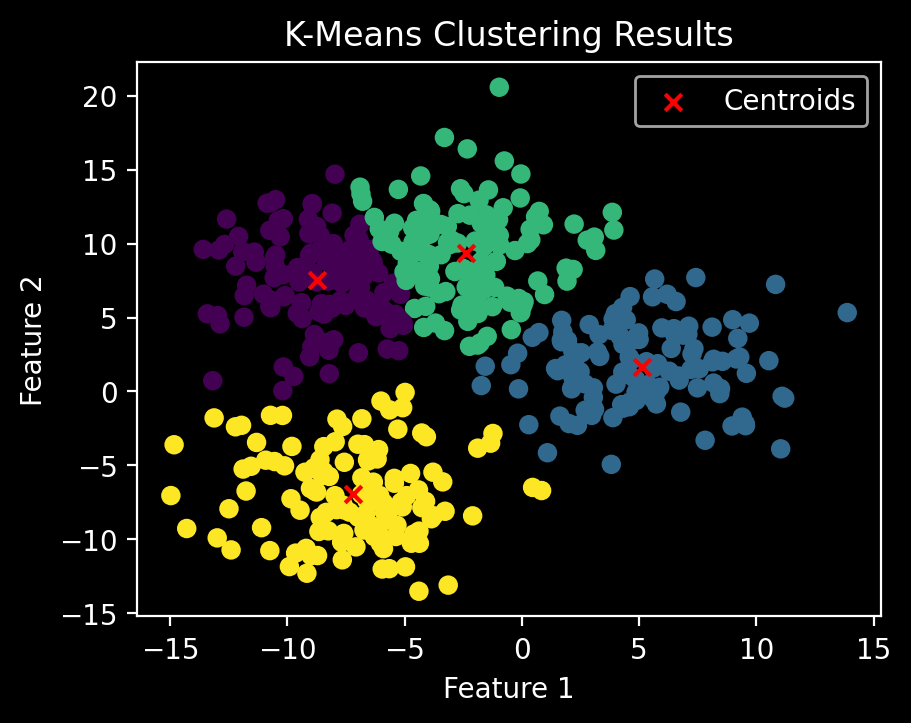

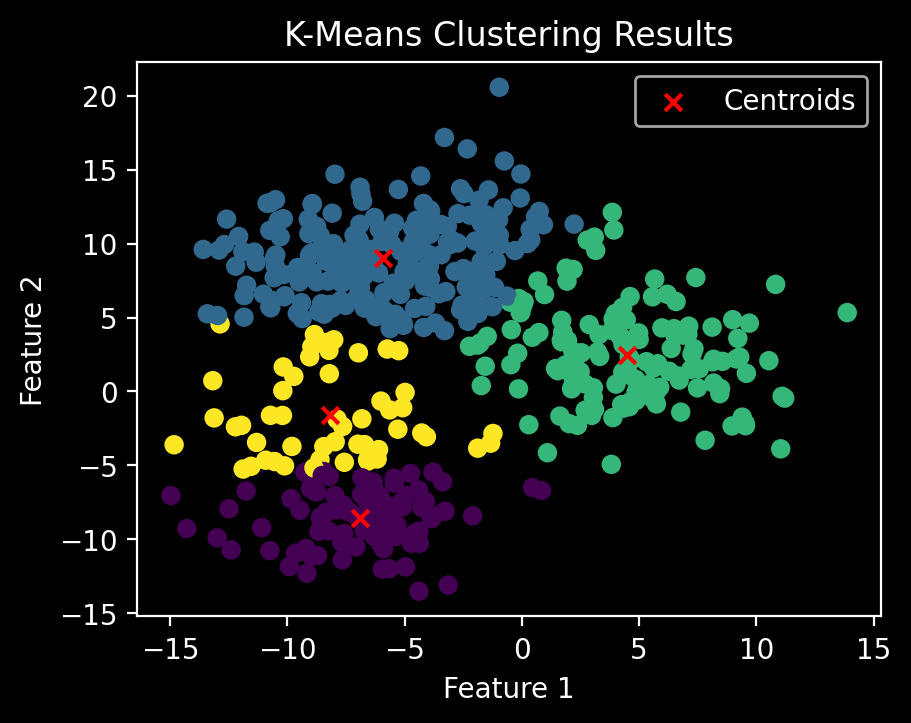

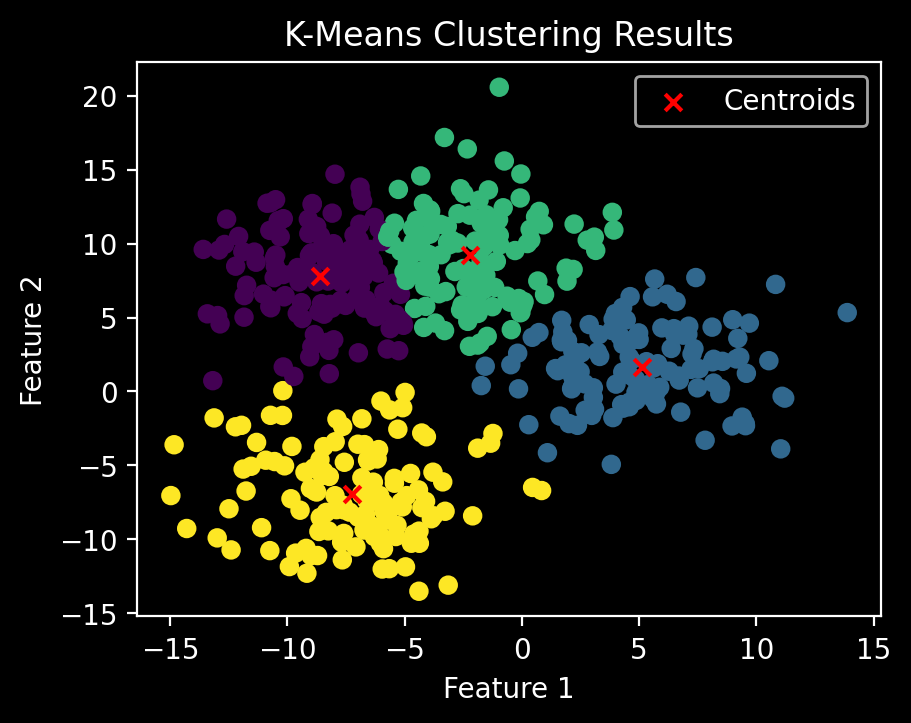

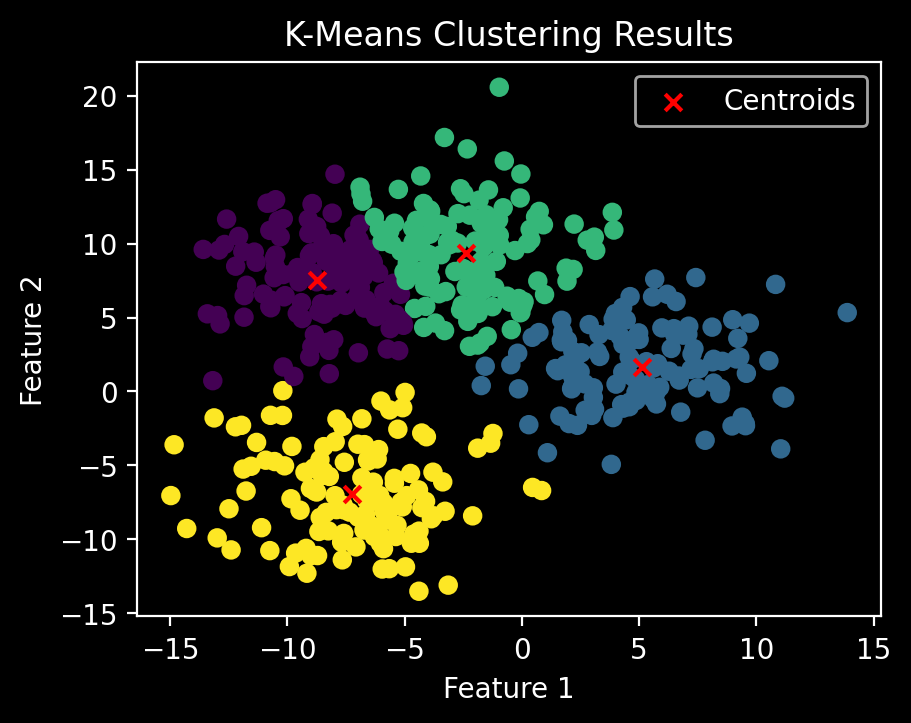

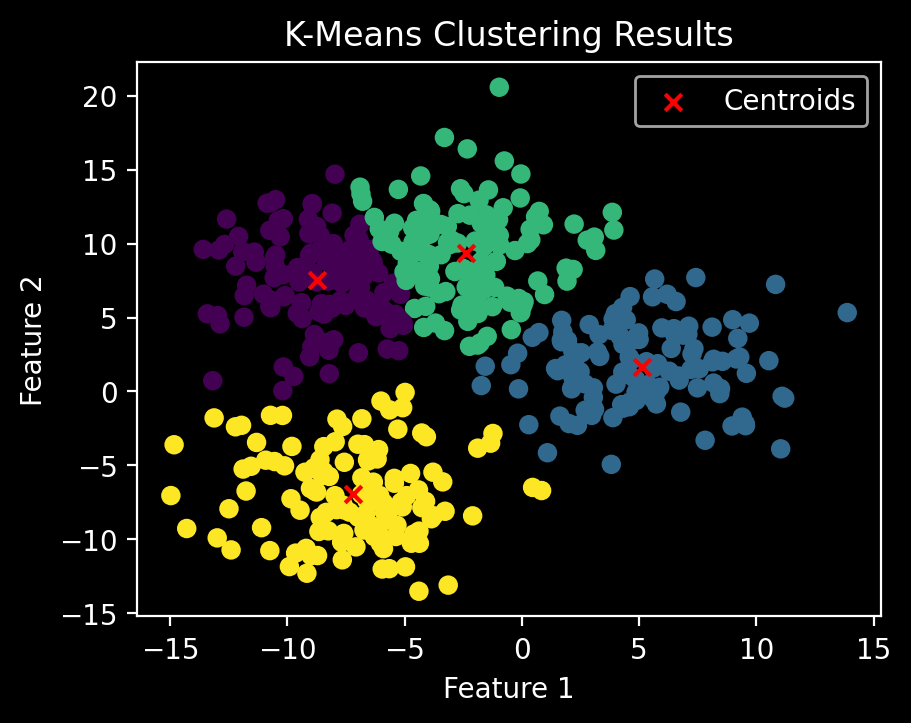

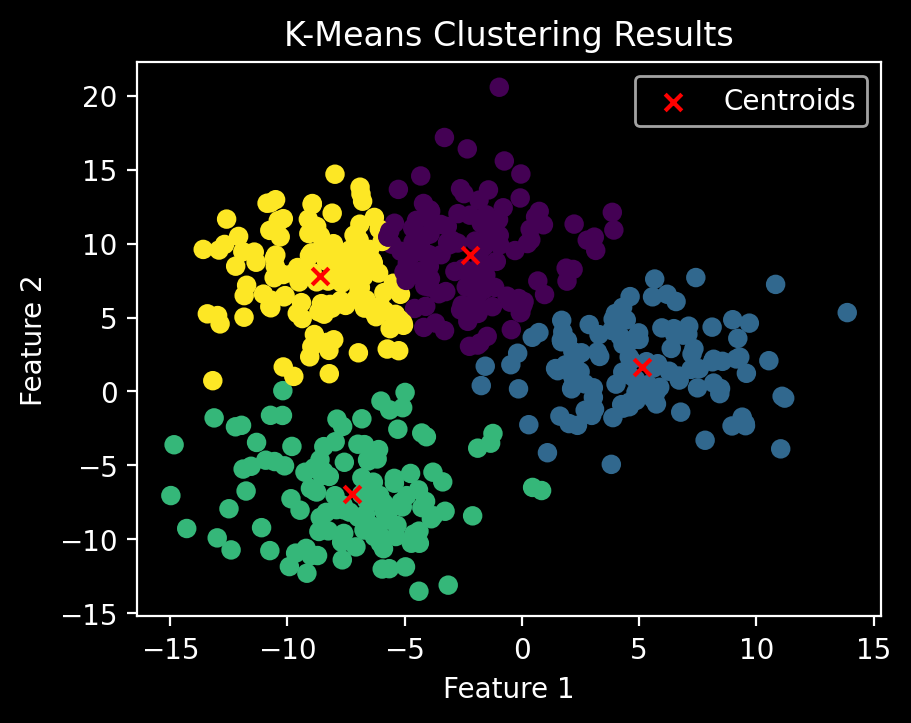

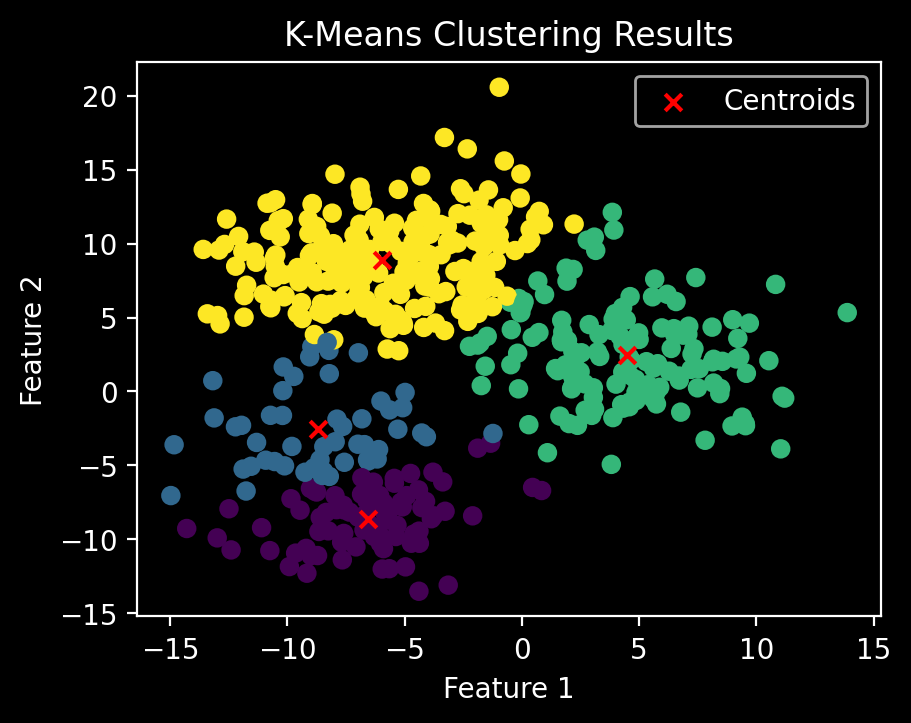

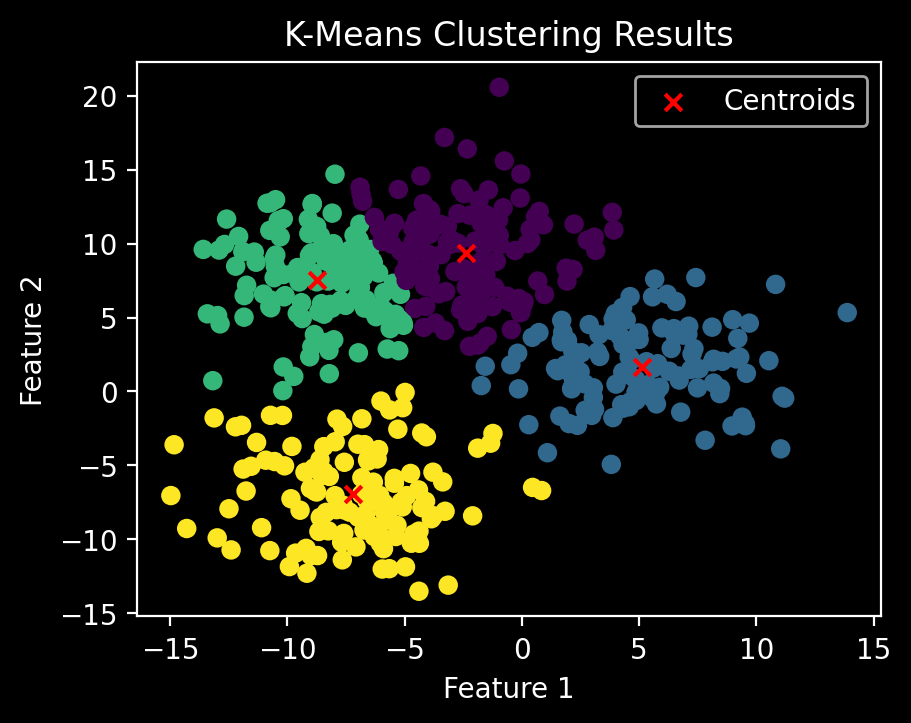

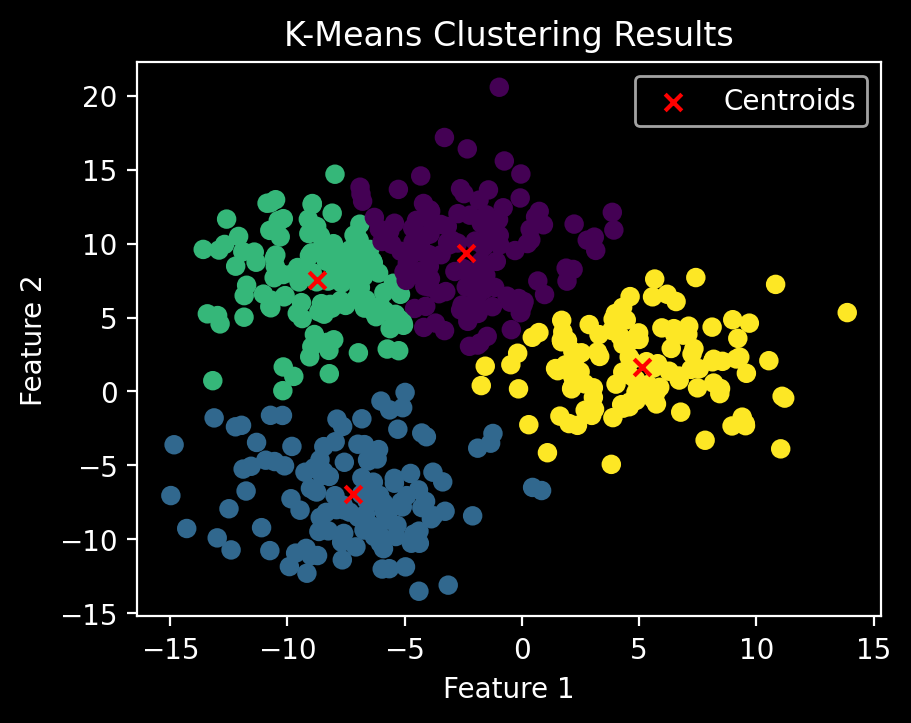

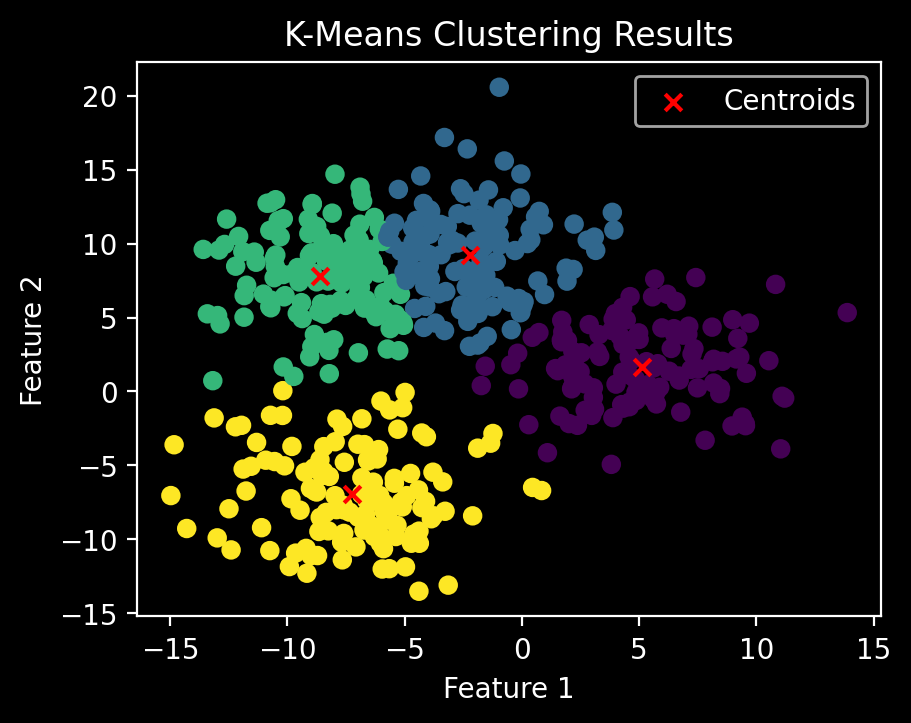

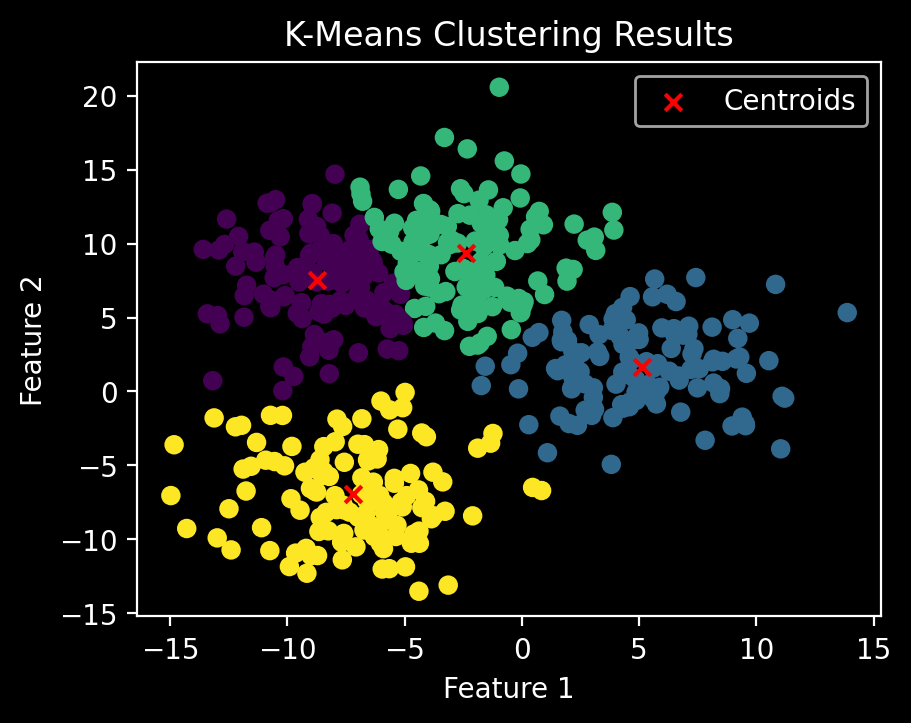

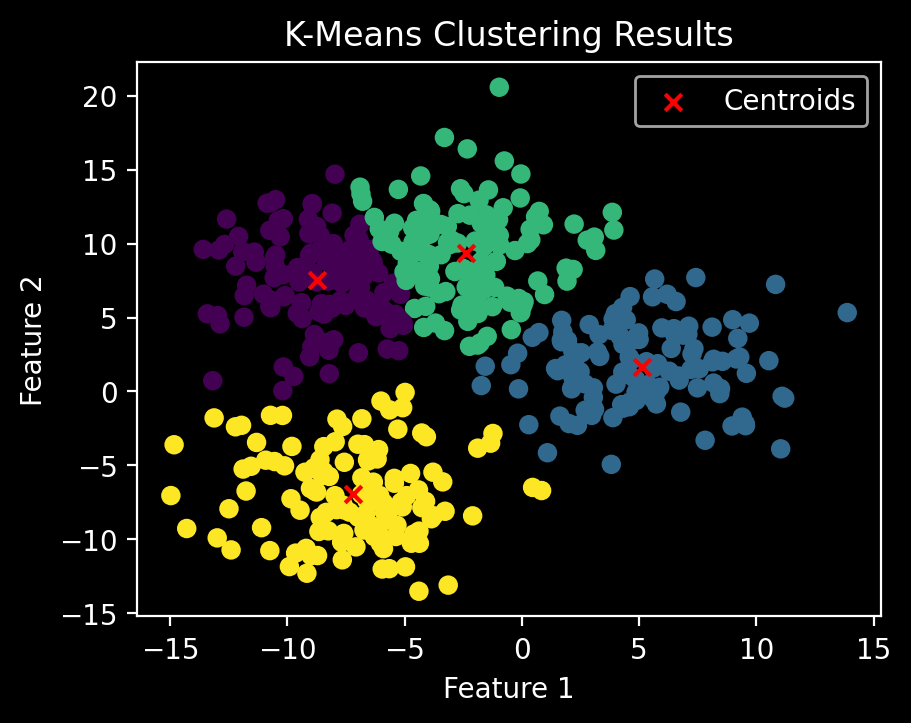

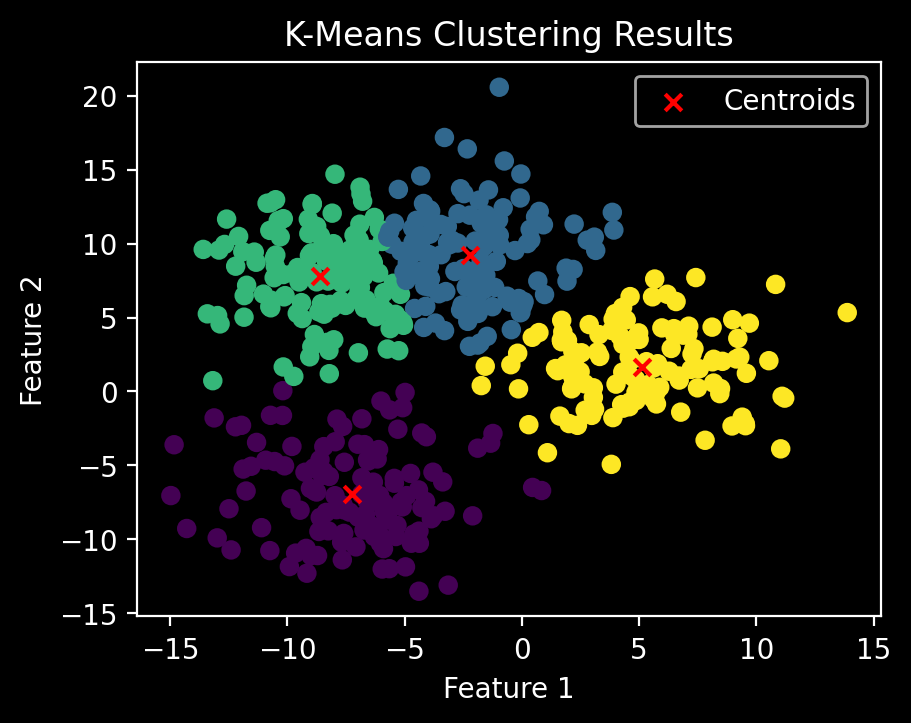

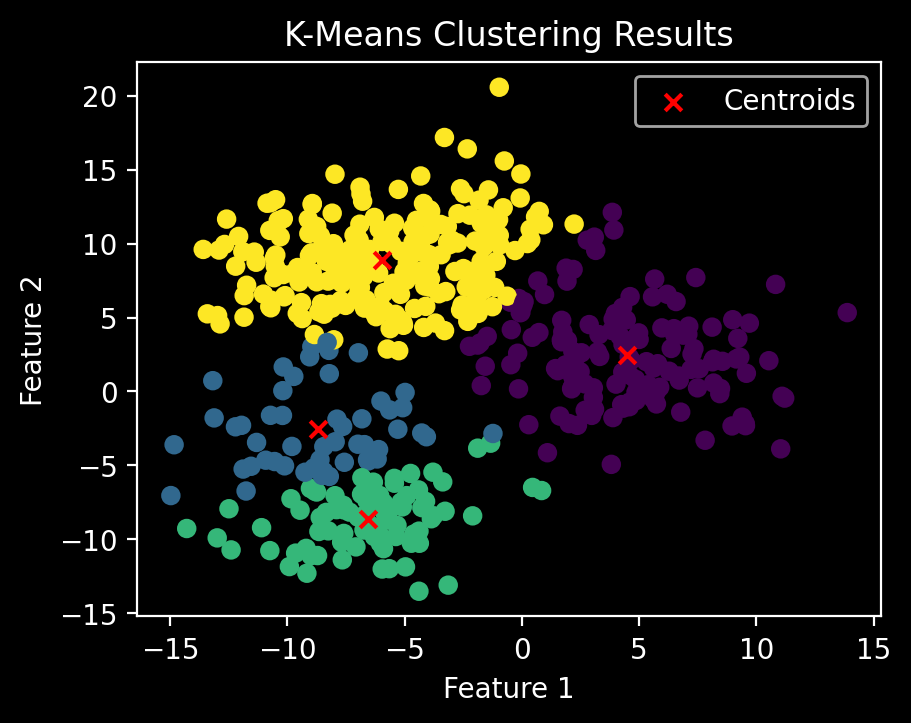

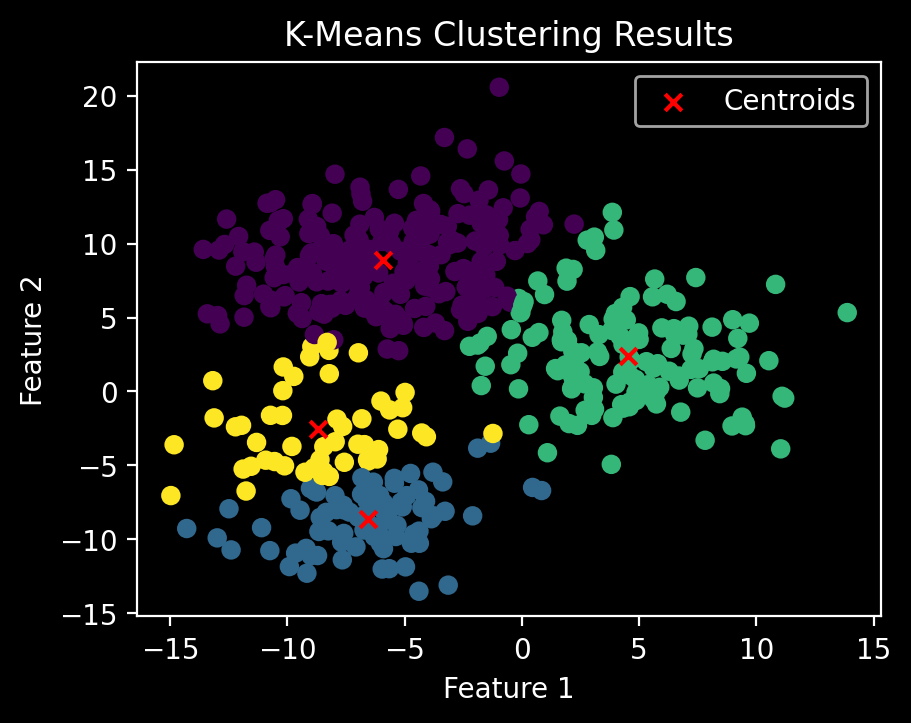

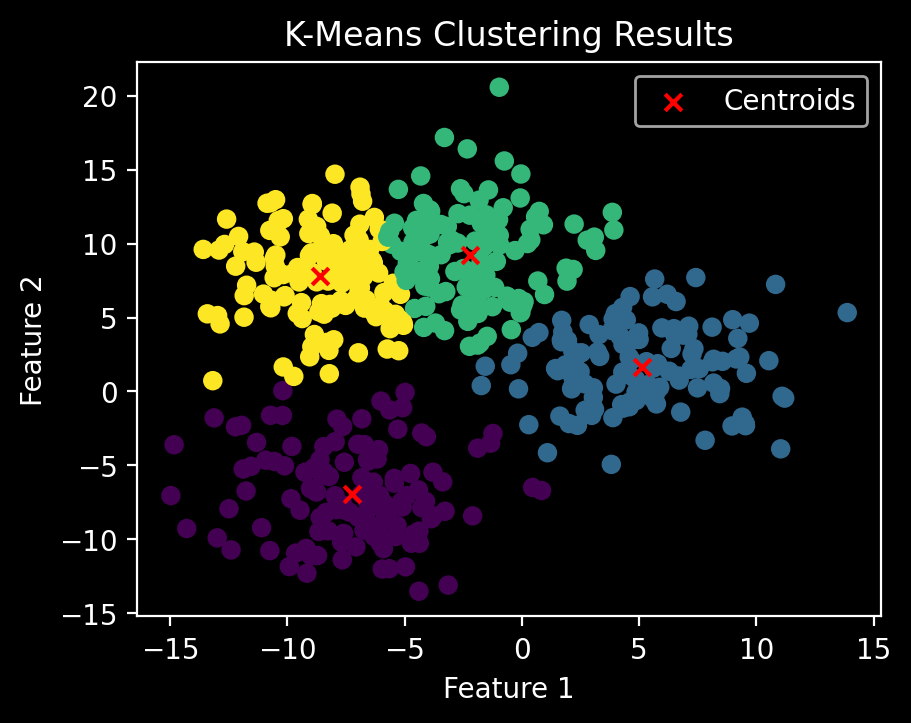

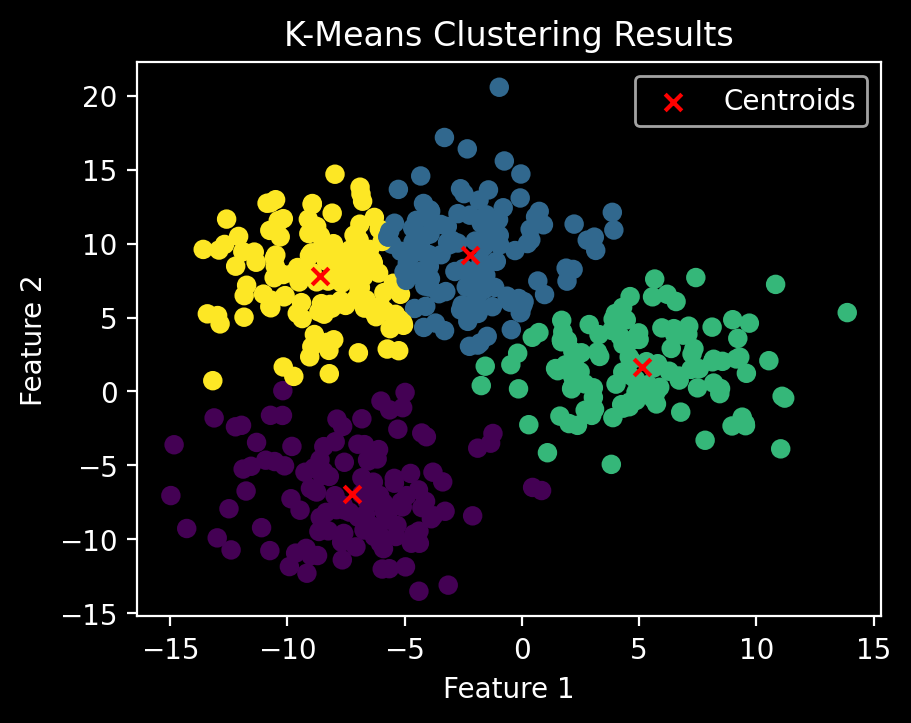

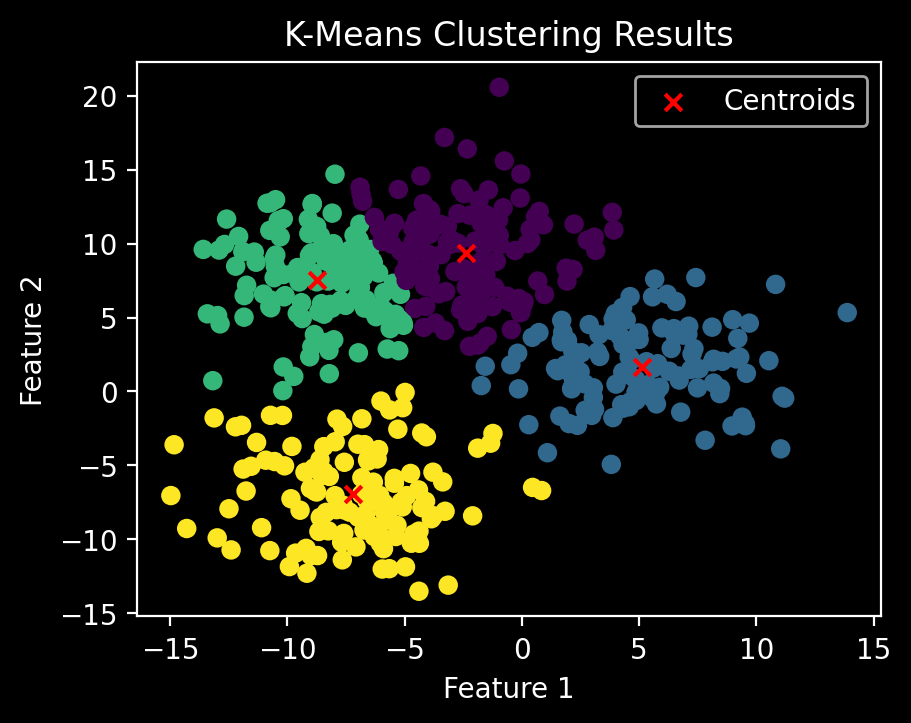

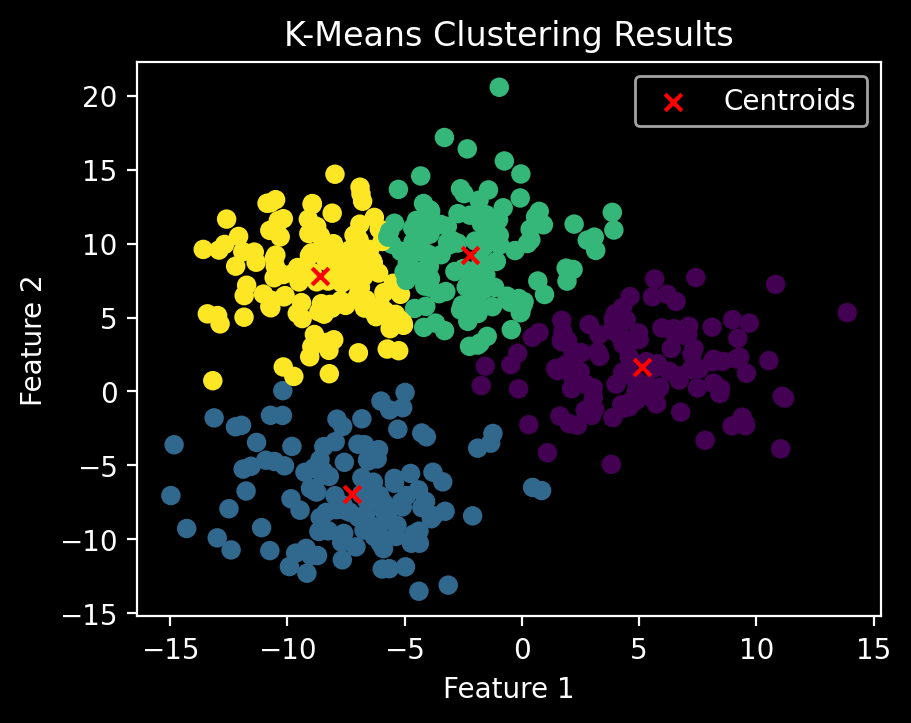

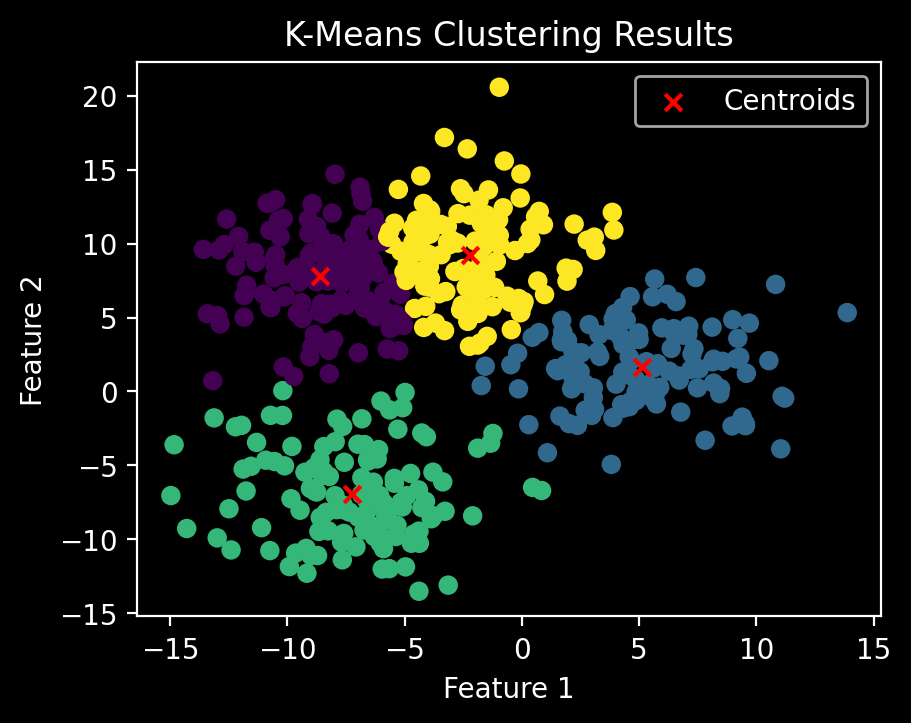

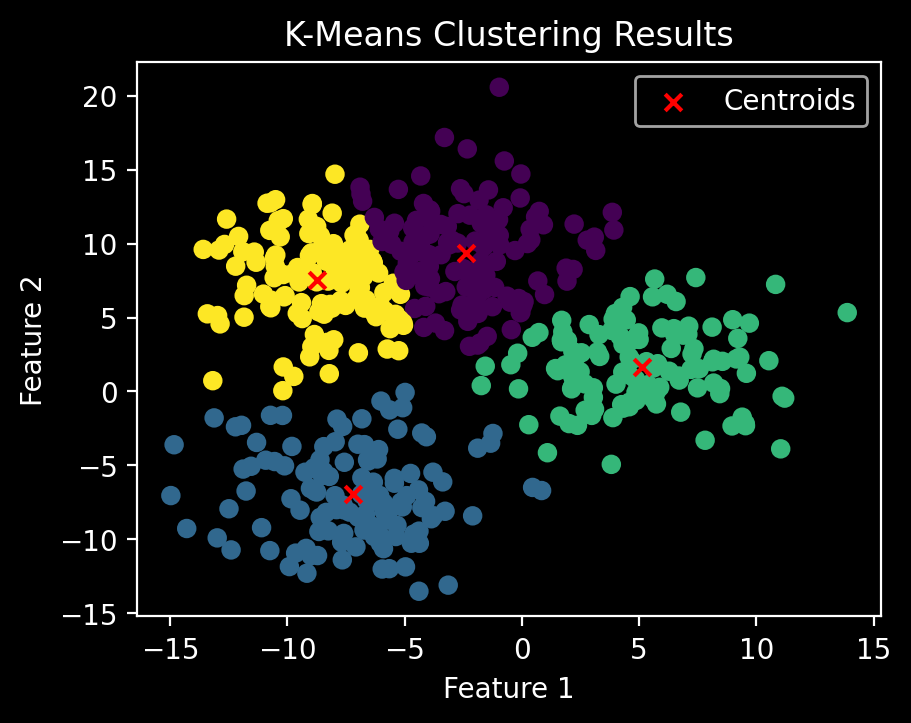

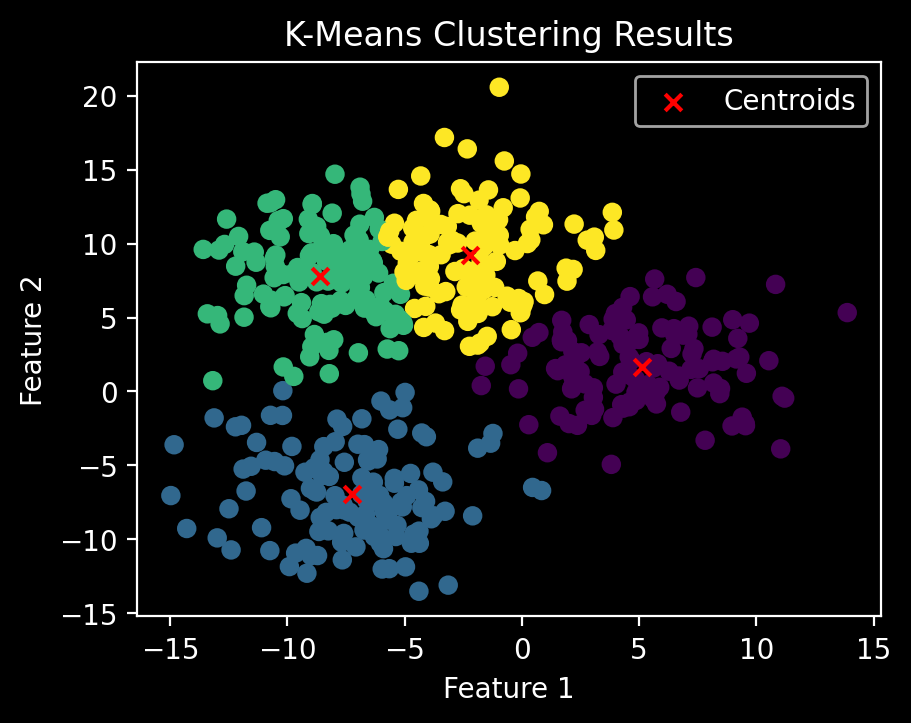

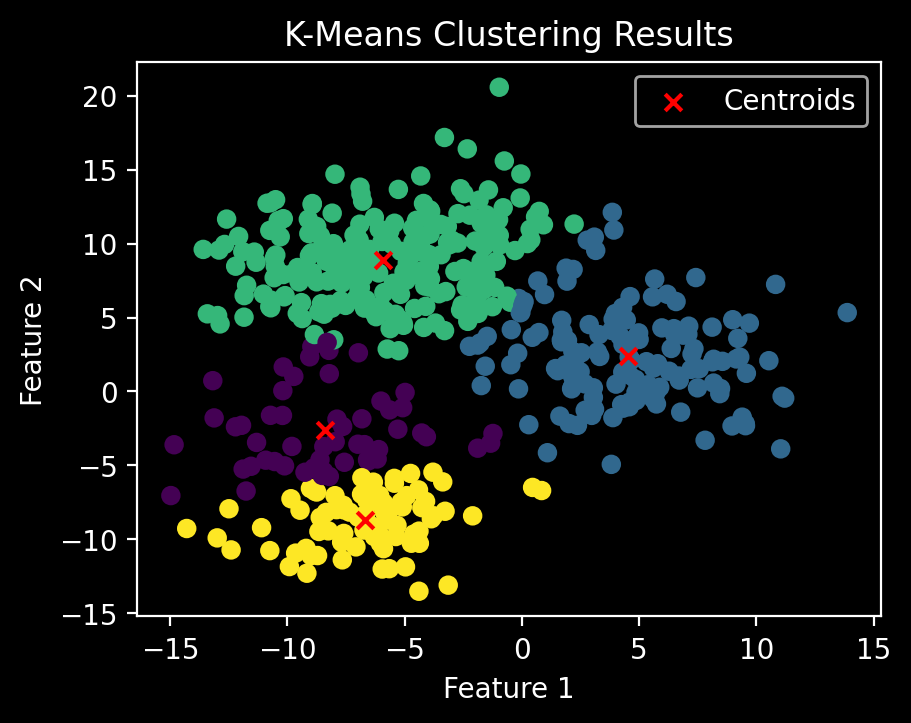

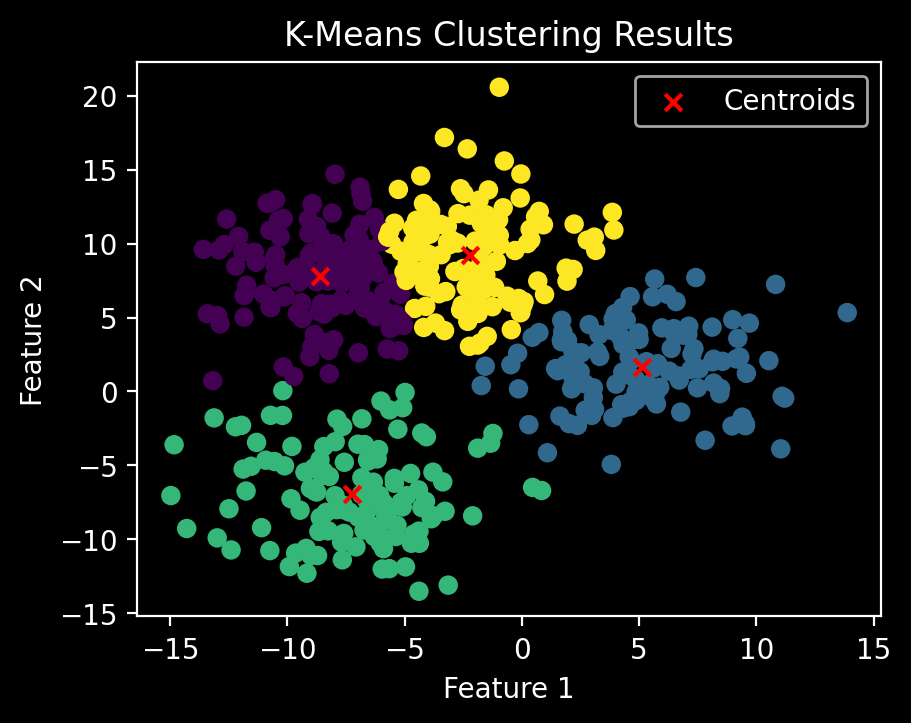

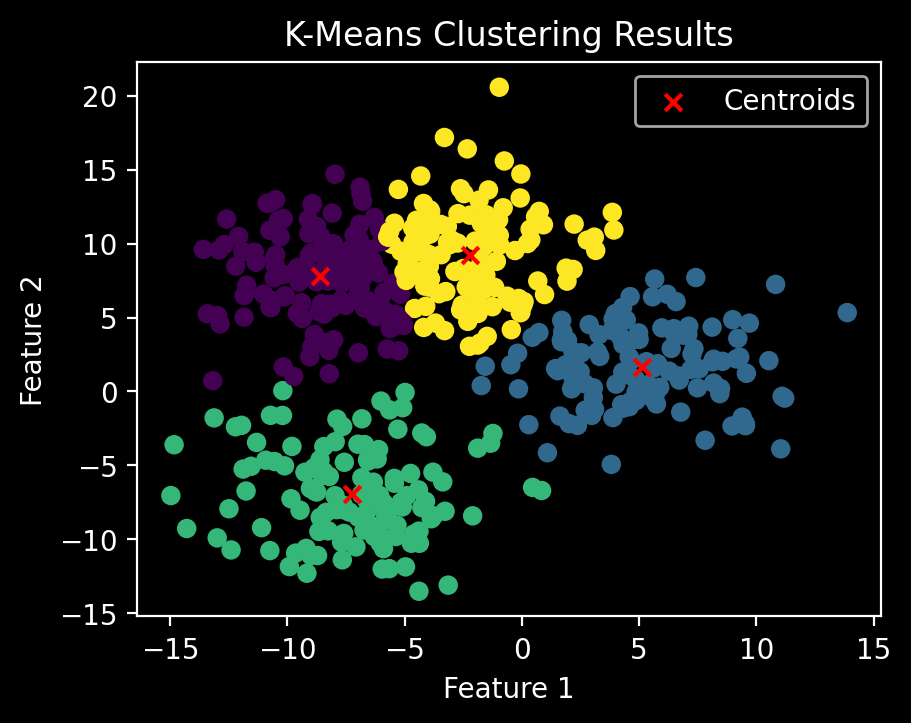

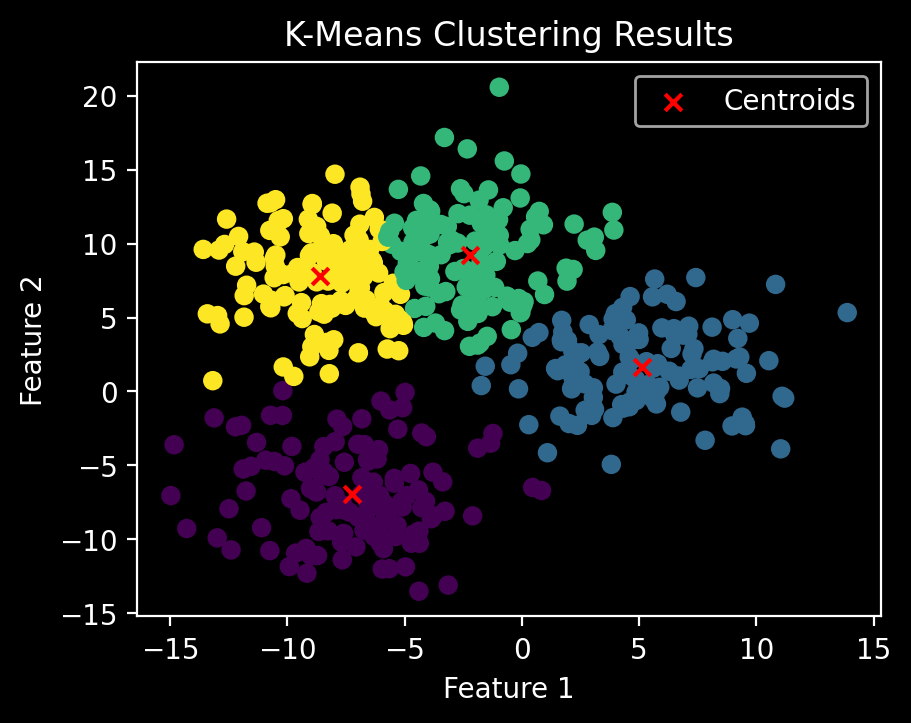

done.


In [13]:
# Implement K-Means Clustering, with a random cluster center initialisation 
for i in range(80,120):
    kmeans = KMeans(n_clusters=4, init='random', n_init=1, random_state=None)
    kmeans.fit(X)

    # Visualize Clustering Results
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Means Clustering Results')
    plt.legend()
    figfilepath = f"output/kmeans-overlap-{i}"
    plt.savefig(fname=figfilepath)
    plt.show()
    # plt.savefig(fname=figfilepath)

print('done.')
# plt.show()


### Run the previous cell multiple times to see that each run ends in a different solution

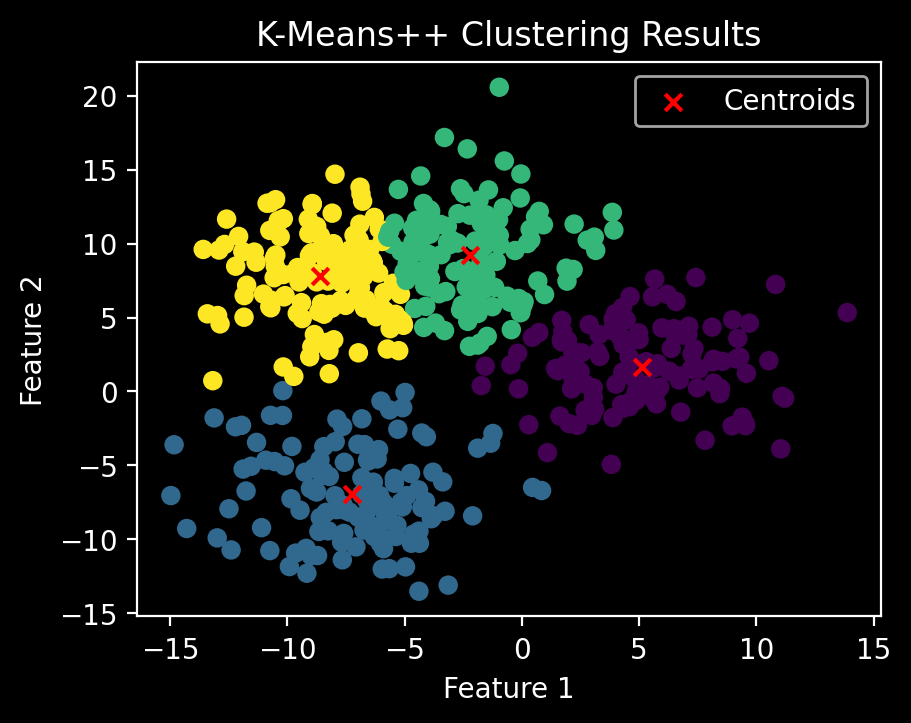

In [20]:
# K-Means++ Implementation for more stable solution
kmeans_plus_plus = KMeans(n_clusters=4, n_init='auto', init='k-means++', random_state=42)
kmeans_plus_plus.fit(X)

# Visualize K-Means++ Clustering Results
plt.scatter(X[:, 0], X[:, 1], c=kmeans_plus_plus.labels_, cmap='viridis')
plt.scatter(kmeans_plus_plus.cluster_centers_[:, 0], kmeans_plus_plus.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means++ Clustering Results')
plt.legend()
plt.show()

## Challenge Activity

### It is time for you to practice all of these steps on a new dataset. The iris dataset has been loaded for you (below). Please complete each cell. 

In [23]:
# Practice: Iris Dataset
iris = load_iris()
X_iris = iris.data
X_iris[:5]




array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [28]:
# selects the first two columns of the X_iris array and assigns them to the variable X
print(X_iris.shape)
# [<all rows>, <first 2 cols>]
X = X_iris[:, :2]
print(X[:5])

(150, 4)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


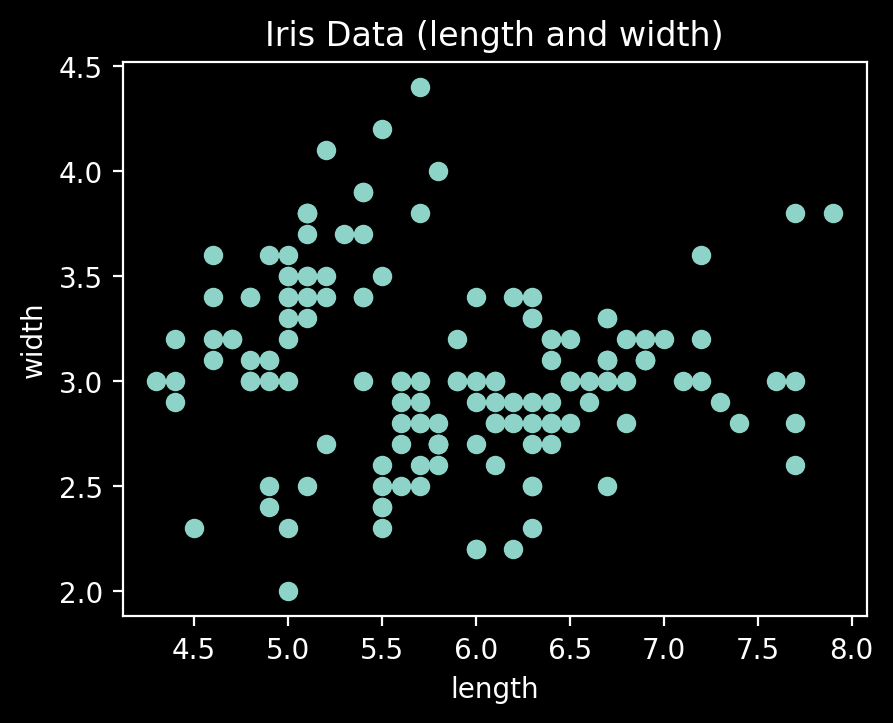

In [29]:
# Visualize the dataset as a scatter plot with xlabel as Length and yLabel as width
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
plt.xlabel('length')
plt.ylabel('width')
plt.title('Iris Data (length and width)')
plt.show()


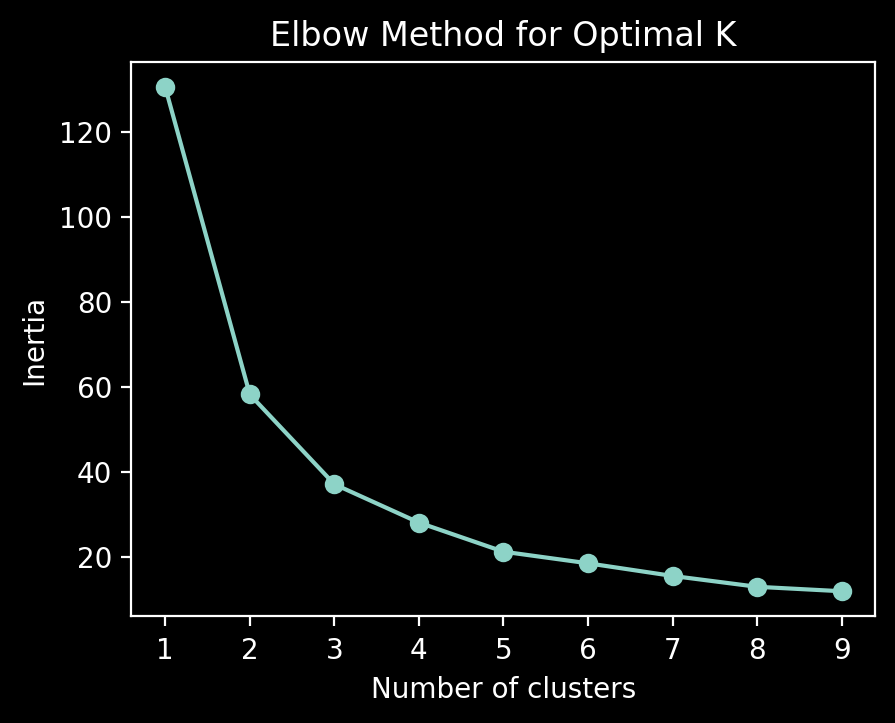

In [30]:
# Use the Elbow Method to find Optimum Number of Clusters between 1 to 10
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(ticks=K)
plt.show()


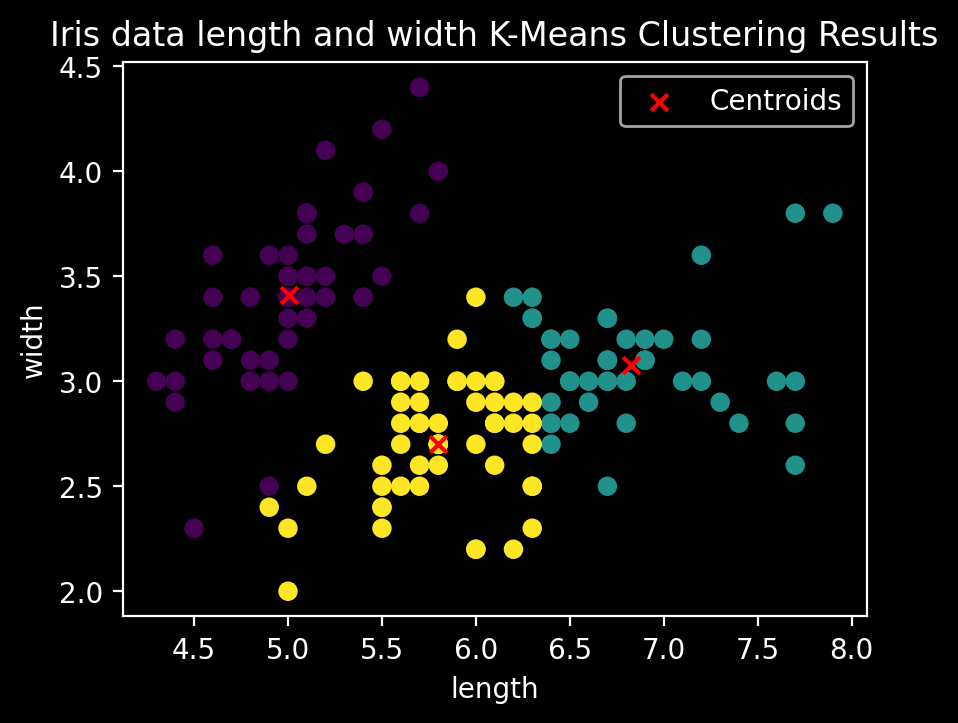

In [39]:
# Implement K-Means Clustering using the optimum number of cluster found by the elbow method
# 2 looks good.
# Implement K-Means Clustering, with a random cluster center initialisation 
kmeans = KMeans(n_clusters=3, init='random', n_init=1, random_state=None)
kmeans.fit(X)

# Visualize Clustering Results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('length')
plt.ylabel('width') 
plt.title('Iris data length and width K-Means Clustering Results')
plt.legend()
plt.show()

In [6]:
# Visualize the Clustering Results as a scatter plot


## Reflection Questions

- What does the make-blobs method do?
    - make_blobs() generates a dataset with clusters of data, each centered on their own centroid, with a given standard deviation within the cluster
- How can we control the overlap between the different clusters generated by the make-blobs function?
    - we can adjust the standard deviation parameter in the make_blobs() call
    - When ran using random initialization, did the results of k-means vary between different runs? Why?
    - they did. k-means does not guarantee an optimal solution, and its algorithm can lead it to local minima. The final state is deterministic but sensitive to initial conditions.
- What number of clusters did you choose for iris data based on the elbow method?
    - it appears that 2 or 3 would be suitable, but after running k-means several times with both, it appears that 3 centroids yields more stable results (less change in cluster membership between runs)
    - moreover, visual inspection of the iris scatter plot suggests that two clusters is reasonable (top left and bottom right), but k-means doesn't group the data into these intuitive clusters.
    - in thinking about it, the fact that k-means did not identify these intuitive clusters makes sense - the group membership that I'm imagining works more like a network, where the proximity to _other members of the group_ serves to lower the score we're trying to minimize, not just the proximity to a centroid. ?? is there a different clustering algorithm based on intra-network distances that would work better than k-means or k-means++ for this distribution of data? There must be. Look at graph theory/network theory? ??